<div class = "alert alert-warning" style="color:black"> <h2>Activity 3.4: examining the effect of having less data.</h2>
<p>The code in the cell below has a loop which trains a newtwork with different amounts of training data, and reports the training and test accuracy for each run. </p>
<p>  Run the cell below and make note of the train and test accuracy for each different sized training data.</p>
 <h4>   Make a hypothesis that explains the  patterns of changing training and test scores you see, and be ready to discuss this in class.</h4></div>

In [1]:
# Find directory holding data depending on what machine you are on
import socket
import numpy as np
if (socket.gethostname()=='csctcloud'): # on csctcloud
    datapath = "../common/datasets/"
else:  # you will need to change this if you are using data on your local machine
    datapath = "../common/datasets/"


In [2]:
### Only  Run this cell if you are using the ccstcloud server
# example code to run on the server using a copy of the data that I have already downloaded and made available.
# label is column 0
# pixel values are from 0-255 so need to be scaled to 0-1

test = np.genfromtxt(datapath + "mnist/mnist_test.csv", delimiter=",")
X_test = test[1:, 1:785] / 255
y_test = test[1:, 0]

train = np.genfromtxt(datapath + "mnist/mnist_train.csv", delimiter=",")
X_train = train[1:, 1:785] / 255
y_train = train[1:, 0]

print(
    f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries"
    f"X_test has shape {X_test.shape} y_test has {len(y_test)} entries."
)

X_train has 60000 rows and 784 columns, y_train has (60000,) entriesX_test has shape (10000, 784) y_test has 10000 entries.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

## MLP specific stuff
from sklearn.neural_network import MLPClassifier
import VisualiseNN as VisNN
for trSetSize in (100, 600, 1000, 6000, 10000, 50000):
    split = trSetSize / 60000
    _, X_train_small, _, y_train_small = train_test_split(
        X_train, y_train, test_size=split, stratify=y_train
    )
    smallMnistMLP = MLPClassifier(
        hidden_layer_sizes=(16),
        max_iter=25,
        alpha=1e-4,
        solver="sgd",
        verbose=0,
        random_state=10,
        learning_rate_init=0.1,
    )

    # put a loop of n runs here

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        smallMnistMLP.fit(X_train_small, y_train_small)
    print(f"With a training set of {trSetSize} examples")
    print(
        f"    Training set accuracy: {100*smallMnistMLP.score(X_train_small, y_train_small)}%"
    )
    print(f"    Test set accuracy: {100*smallMnistMLP.score(X_test, y_test)}%")

With a training set of 100 examples
    Training set accuracy: 99.0%
    Test set accuracy: 70.17999999999999%
With a training set of 600 examples
    Training set accuracy: 99.83333333333333%
    Test set accuracy: 85.44%
With a training set of 1000 examples
    Training set accuracy: 99.9%
    Test set accuracy: 87.72999999999999%
With a training set of 6000 examples
    Training set accuracy: 99.26666666666667%
    Test set accuracy: 91.95%
With a training set of 10000 examples
    Training set accuracy: 99.26%
    Test set accuracy: 92.58999999999999%
With a training set of 50000 examples
    Training set accuracy: 96.49799999999999%
    Test set accuracy: 94.82000000000001%


<div class = "alert alert-warning" style="color:black"><h2> (Stretch) Activity 3.5: Gathering evidence for your hypothesis.</h2>
<ol>
    <li> Copy and paste the code from the previous cell into the cell below. </li>
    <li> <b>Edit</b> the code by: <ul>
        <li> Adding an array called results with 4 columns and 30 rows, initialised to zero (hint: np,zeros). </li>
        <li> Adding a loop so that it runs the experiment for each training set size  5 times.</li>
        <li> saving the training and test accuracy from each run into a seperate row in your new  array.</li>
        <li> Store the training set size in results column 0, run number in column 1, training accuracy in column 2 and test accuracy in column 3.</li>
     </ul>
    <li> Use matplotlib to make a plot with training set size on the x-axis and accuracy on the y-axis</li>
        <li> Plot your results as two different lines on your plot, with error bars for each.</li>
        </ol>
        <p> <b>  HINT: google is good to find code snippets to make plots with.</b></p.</div>

Size: 100, Run: 0, Train Acc: 99.00%, Test Acc: 67.65%
Size: 100, Run: 1, Train Acc: 100.00%, Test Acc: 73.59%
Size: 100, Run: 2, Train Acc: 100.00%, Test Acc: 71.86%
Size: 100, Run: 3, Train Acc: 100.00%, Test Acc: 72.24%
Size: 100, Run: 4, Train Acc: 100.00%, Test Acc: 64.95%
Size: 600, Run: 0, Train Acc: 99.83%, Test Acc: 85.06%
Size: 600, Run: 1, Train Acc: 100.00%, Test Acc: 86.40%
Size: 600, Run: 2, Train Acc: 100.00%, Test Acc: 86.22%
Size: 600, Run: 3, Train Acc: 100.00%, Test Acc: 86.23%
Size: 600, Run: 4, Train Acc: 100.00%, Test Acc: 86.06%
Size: 1000, Run: 0, Train Acc: 99.80%, Test Acc: 86.88%
Size: 1000, Run: 1, Train Acc: 100.00%, Test Acc: 87.73%
Size: 1000, Run: 2, Train Acc: 100.00%, Test Acc: 87.96%
Size: 1000, Run: 3, Train Acc: 100.00%, Test Acc: 87.66%
Size: 1000, Run: 4, Train Acc: 99.90%, Test Acc: 88.13%
Size: 6000, Run: 0, Train Acc: 99.32%, Test Acc: 90.84%
Size: 6000, Run: 1, Train Acc: 99.37%, Test Acc: 91.29%
Size: 6000, Run: 2, Train Acc: 99.23%, Test Acc

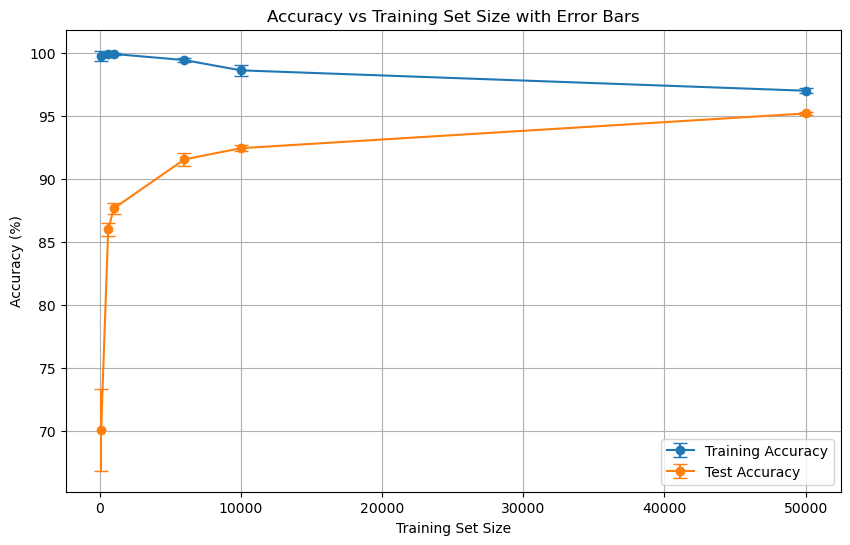

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

# Assuming data is loaded as in the original code
# For demonstration, I'll assume X_train, y_train, X_test, y_test are available

# Initialize results array: 30 rows (6 sizes * 5 runs), 4 columns (size, run, train_acc, test_acc)
results = np.zeros((30, 4))
row_idx = 0

# Training set sizes to test
trSetSizes = [100, 600, 1000, 6000, 10000, 50000]

# Run experiments
for trSetSize in trSetSizes:
    split = trSetSize / 60000
    for run in range(5):  # 5 runs per size
        # Split the training data
        _, X_train_small, _, y_train_small = train_test_split(
            X_train, y_train, test_size=split, stratify=y_train, random_state=run
        )

        # Define and train the model
        smallMnistMLP = MLPClassifier(
            hidden_layer_sizes=(16),
            max_iter=25,
            alpha=1e-4,
            solver="sgd",
            verbose=0,
            random_state=10 + run,  # Vary random state per run
            learning_rate_init=0.1,
        )

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            smallMnistMLP.fit(X_train_small, y_train_small)

        # Calculate accuracies
        train_acc = 100 * smallMnistMLP.score(X_train_small, y_train_small)
        test_acc = 100 * smallMnistMLP.score(X_test, y_test)

        # Store results
        results[row_idx] = [trSetSize, run, train_acc, test_acc]
        row_idx += 1
        print(f"Size: {trSetSize}, Run: {run}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# Compute means and standard deviations for plotting
mean_train_acc = []
std_train_acc = []
mean_test_acc = []
std_test_acc = []

for trSetSize in trSetSizes:
    size_results = results[results[:, 0] == trSetSize]
    mean_train_acc.append(np.mean(size_results[:, 2]))
    std_train_acc.append(np.std(size_results[:, 2]))
    mean_test_acc.append(np.mean(size_results[:, 3]))
    std_test_acc.append(np.std(size_results[:, 3]))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(trSetSizes, mean_train_acc, yerr=std_train_acc, label='Training Accuracy', fmt='-o', capsize=5)
plt.errorbar(trSetSizes, mean_test_acc, yerr=std_test_acc, label='Test Accuracy', fmt='-o', capsize=5)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Training Set Size with Error Bars')
plt.legend()
plt.grid(True)
plt.show()